# **Projekt - Predikcije budućih online naručivanja hrane**

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
%cd /content/drive/MyDrive/projekt

/content/drive/MyDrive/projekt


In [197]:
podaci = pd.read_csv('onlinefoods.csv', sep = ',')

In [198]:
podaci

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes




**Histogram koji ovisno o dobi prikazuje koliko kupaca te dobi će opet naručiti hranu, a koliko ne.**



In [199]:
import seaborn as sns

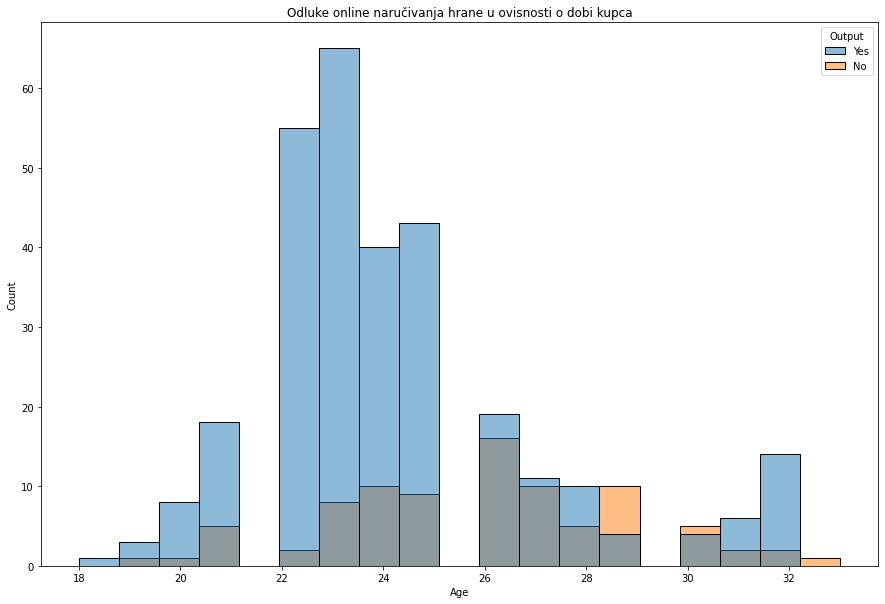

In [200]:
plt.figure(figsize=(15, 10))
plt.title("Odluke online naručivanja hrane u ovisnosti o dobi kupca")

sns.histplot(x="Age", hue="Output", data=podaci, color='pink')

**Histogram koji ovisno o broju članova obitelji prikazuje koliko kupaca iste veličine obitelji će opet naručiti hranu, a koliko ne.**



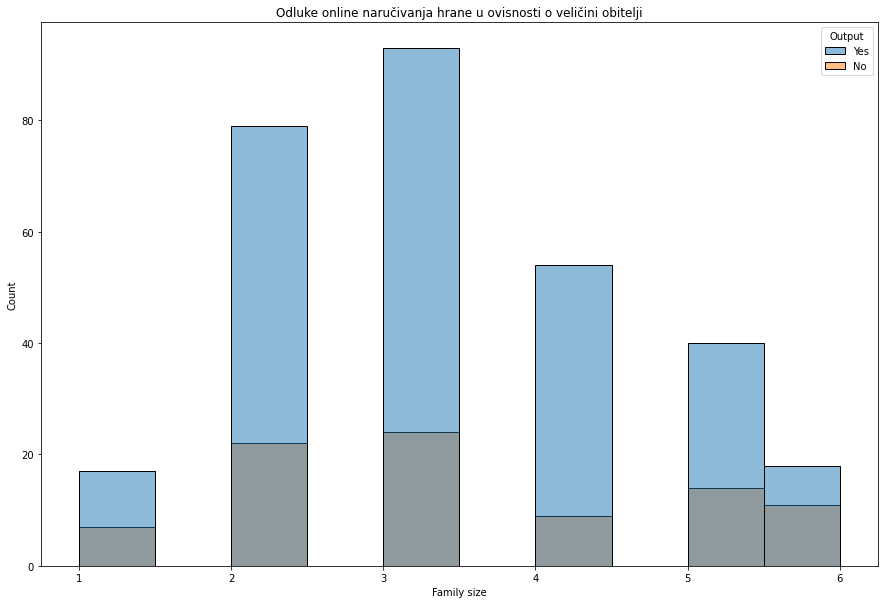

In [201]:
plt.figure(figsize=(15, 10))
plt.title("Odluke online naručivanja hrane u ovisnosti o veličini obitelji")
sns.histplot(x="Family size", hue="Output", data=podaci, color='pink')
plt.show()

In [202]:
buying_again_data = podaci.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [203]:
import plotly.graph_objects as go

In [204]:
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['pink','purple']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Tko više naručuje hranu online: Muškarci Vs. Žene')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [205]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['pink','purple','lightblue']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Tko više naručuje hranu online: Zauzeti Vs. Slobodni')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [206]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['pink','purple','lightblue','blue','lightred']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Tko u ovisnosti o prihodima naručuje više?')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [207]:
podaci["Output"]=podaci["Output"].map({"Yes":1, "No":0})
podaci

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,1,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,1,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,1,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,1,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,1,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,1,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,1,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,1,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,1,Positive,Yes


In [208]:
X = podaci[["Age","Family size", "Pin code", "latitude", "longitude", "Pin code" ]]
y = podaci[["Output"]]

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

# Stablo odluke

In [210]:
from sklearn.tree import DecisionTreeClassifier

stablo_odluke=DecisionTreeClassifier()

stablo_odluke.fit(X_train,y_train)

predictions=stablo_odluke.predict(X_test)

In [211]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1])

In [212]:
from sklearn import metrics

In [213]:
print("Točnost na skupu za testiranje: {:.2f}%".format(metrics.accuracy_score(y_test, stablo_odluke.predict(X_test)) * 100))

Točnost na skupu za testiranje: 83.51%


In [214]:
y_pred_train = stablo_odluke.predict(X_train)
print("Točnost na skupu za treniranje: {:.2f}%".format(metrics.accuracy_score(y_train, y_pred_train) * 100))

Točnost na skupu za treniranje: 98.97%


# Neuronske mreže



In [215]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
model = Sequential()

model.add(Dense(500, input_dim=6, activation='relu'))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))  #sigmoid jer je binarna klasifikacija

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [218]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 500)               3500      
                                                                 
 dense_16 (Dense)            (None, 250)               125250    
                                                                 
 dense_17 (Dense)            (None, 1)                 251       
                                                                 
Total params: 129,001
Trainable params: 129,001
Non-trainable params: 0
_________________________________________________________________


In [219]:
br_epoha = 250
history = model.fit(X_train_scaled, y_train,
                    validation_data = (X_test_scaled, y_test),
                    epochs = br_epoha,
                    batch_size = 64,
                    verbose = 1)

Epoch 1/250
5/5 [==============================] - 1s 55ms/step - loss: 0.6772 - accuracy: 0.7354 - val_loss: 0.6692 - val_accuracy: 0.7526
Epoch 2/250
5/5 [==============================] - 0s 12ms/step - loss: 0.6655 - accuracy: 0.7354 - val_loss: 0.6555 - val_accuracy: 0.8041
Epoch 3/250
5/5 [==============================] - 0s 12ms/step - loss: 0.6547 - accuracy: 0.7423 - val_loss: 0.6431 - val_accuracy: 0.8041
Epoch 4/250
5/5 [==============================] - 0s 11ms/step - loss: 0.6447 - accuracy: 0.7491 - val_loss: 0.6317 - val_accuracy: 0.8041
Epoch 5/250
5/5 [==============================] - 0s 13ms/step - loss: 0.6355 - accuracy: 0.7663 - val_loss: 0.6208 - val_accuracy: 0.8041
Epoch 6/250
5/5 [==============================] - 0s 12ms/step - loss: 0.6269 - accuracy: 0.7663 - val_loss: 0.6117 - val_accuracy: 0.8041
Epoch 7/250
5/5 [==============================] - 0s 12ms/step - loss: 0.6197 - accuracy: 0.7663 - val_loss: 0.6030 - val_accuracy: 0.8041
Epoch 8/250
5/5 [===

In [220]:
y_pred = model.predict(X_test_scaled)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.82549256],
       [0.73018384],
       [0.7741442 ],
       [0.76495224],
       [0.7131902 ],
       [0.9347884 ],
       [0.8303974 ],
       [0.72304267],
       [0.74344635],
       [0.8731217 ],
       [0.5535414 ],
       [0.8626142 ],
       [0.87163776],
       [0.8510816 ],
       [0.87879723],
       [0.65041006],
       [0.6405216 ],
       [0.8594812 ],
       [0.56302655],
       [0.5235002 ],
       [0.8768913 ],
       [0.4055499 ],
       [0.8476885 ],
       [0.5819035 ],
       [0.8355923 ],
       [0.7633569 ],
       [0.8267004 ],
       [0.40564442],
       [0.8214063 ],
       [0.70979476],
       [0.75809675],
       [0.63218576],
       [0.5066851 ],
       [0.8355923 ],
       [0.8822509 ],
       [0.8012757 ],
       [0.70700186],
       [0.8050832 ],
       [0.61271083],
       [0.5508    ],
       [0.79863936],
       [0.7841316 ],
       [0.6803689 ],
       [0.93894243],
       [0.9385722 ],
       [0.90325457],
       [0.8355923 ],
       [0.758

In [221]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print('Loss: {:.4f}\nAccuracy: {:.2f}%'.format(loss, acc*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8041
Loss: 0.4299
Accuracy: 80.41%


In [222]:
loss, acc = model.evaluate(X_train_scaled, y_train)
print('Loss: {:.4f}\nAccuracy: {:.2f}%'.format(loss, acc*100))

10/10 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7938
Loss: 0.4469
Accuracy: 79.38%


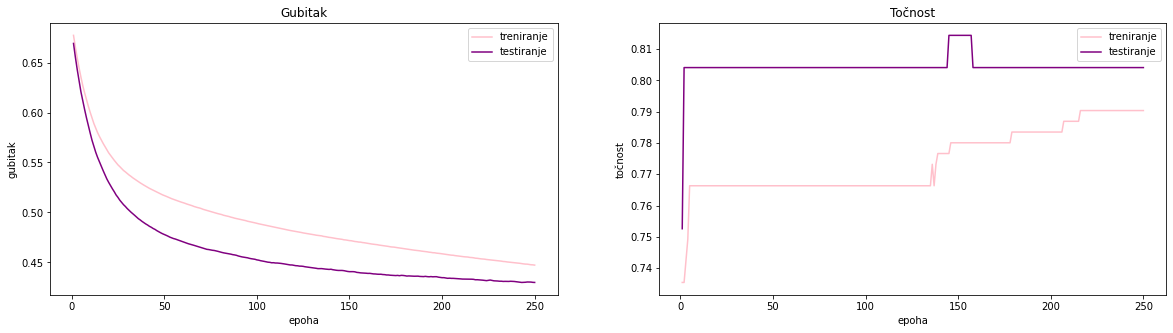

In [223]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Gubitak")
plt.xlabel("epoha")
plt.ylabel("gubitak")
plt.plot(range(1,br_epoha+1), history.history['loss'], label = 'treniranje', color='pink')
plt.plot(range(1,br_epoha+1), history.history['val_loss'], label = 'testiranje', color='purple')
plt.legend()


plt.subplot(1, 2, 2)
plt.title("Točnost")
plt.xlabel("epoha")
plt.ylabel("točnost")
plt.plot(range(1,br_epoha+1), history.history['accuracy'], label = 'treniranje', color='pink')
plt.plot(range(1,br_epoha+1), history.history['val_accuracy'], label = 'testiranje', color='purple')

plt.legend()

**Usporedba točnosti stabla odluke i neuronske mreže na podacima za treniranje i 
testiranje:**

Točnost na skupu za treniranje stabla odluke je 98.97%, a kod neuronske mreže je 79.38%.
Točnost na skupu za testiranje stabla odluke je 83.51%, a kod neuronske mreže je 80.41%.
Možemo zaključiti da je za dane podatke bolje odabrati stablo odluke.
